# Autoencoders for Anomaly Detection

## Introduction
Autoencoders are a type of neural network used to learn efficient representations of data, typically for dimensionality reduction or feature learning. They work by encoding the input into a lower-dimensional space and then reconstructing the output from this encoding. 

In this exercise, we will use an autoencoder to detect anomalies in images. The idea is to train the autoencoder to reconstruct normal images. When an anomalous image is input, the reconstruction error (difference between the input and output) will be higher compared to normal images.

### Objectives
- Understand the architecture of an autoencoder
- Implement an autoencoder using TensorFlow and Keras
- Use the autoencoder to detect anomalies in images


## Data Preparation
In this section, we will load and preprocess the dataset. We will use the MNIST dataset for this exercise. The MNIST dataset consists of handwritten digits, which we will use as normal data. To simulate anomalies, we will introduce random noise to some of the images.


In [66]:
# pip install tensorflow

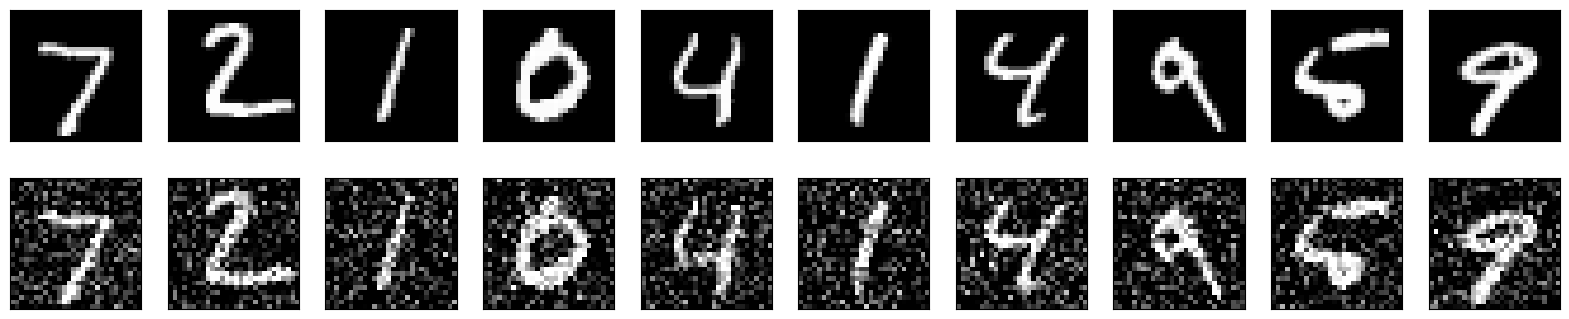

In [67]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the data to fit the model
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce random noise to the test set to create anomalies
x_test_noisy = x_test + np.random.normal(loc=0.0, scale=0.3, size=x_test.shape)

# Clip the values to be between 0 and 1
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Plot some examples of normal and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display normal images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Building the Autoencoder
An autoencoder consists of an encoder and a decoder. The encoder compresses the input into a latent-space representation, and the decoder reconstructs the input from this representation.

In this section, we will build a simple autoencoder using Keras. The encoder will reduce the 28x28 input images to a lower-dimensional representation, and the decoder will reconstruct the images from this representation.


In [68]:
# Define the dimensions of the input image
input_img = x_train[0].shape
input_img

(28, 28, 1)

In [69]:
from tensorflow import keras

# Encoder
input_x = Input(shape = (input_img))
x = Flatten()(input_x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)


# Decoder

x = Dense(128, activation='relu')(x)
x = Dense(784, activation='sigmoid')(x)
output_x = Reshape((28, 28, 1))(x)



In [70]:
# Autoencoder model
autoencoder = Model(input_x, output_x)


In [71]:
# Compile the model
autoencoder.compile(optimizer= "adam",
                    loss = "binary_crossentropy")

In [72]:
# Display the model architecture
autoencoder.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Autoencoder
We will train the autoencoder using the normal images from the MNIST dataset. The goal is for the autoencoder to learn to reconstruct these normal images accurately.


In [73]:
# Train the autoencoder: epochs=10, batch_size=256, shuffle=True, validation_split=0.2

history = autoencoder.fit(
    x_train, x_train,
    epochs=10, 
    batch_size=256, 
    shuffle=True, 
    validation_split=0.2)


Epoch 1/10


188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3538 - val_loss: 0.1629
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1500 - val_loss: 0.1230
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1180 - val_loss: 0.1091
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1064 - val_loss: 0.1024
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1007 - val_loss: 0.0989
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0971 - val_loss: 0.0956
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0939 - val_loss: 0.0930
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0918 - val_loss: 0.0911
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0896 - val_loss: 0.0892
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0882 - val_loss: 0.0880


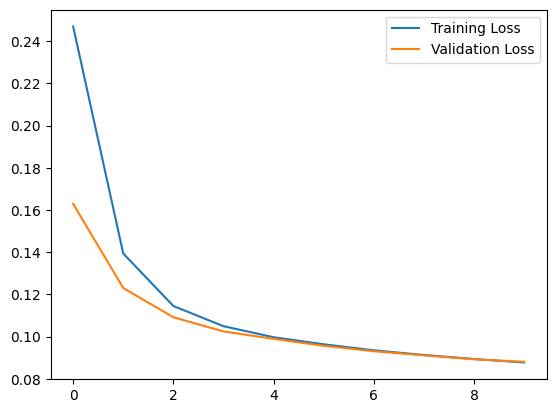

In [74]:

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

## Evaluating the Autoencoder
Once the autoencoder is trained, we can evaluate its performance on the normal and noisy images. We expect the reconstruction error to be higher for the noisy (anomalous) images compared to the normal images.


In [75]:
# Predict on the normal and noisy test sets
decoded_imgs = autoencoder.predict(x_test)



  1/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [76]:
decoded_imgs_noisy = autoencoder.predict(x_test_noisy)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step


In [77]:
mse_normal = np.mean(np.square(x_test - decoded_imgs), axis=(1, 2, 3))
mse_normal


array([0.00485897, 0.0094504 , 0.00164551, ..., 0.00409906, 0.0089657 ,
       0.0121401 ], dtype=float32)

In [78]:
print(f"Average MSE for normal images: {np.mean(mse_normal)}")

Average MSE for normal images: 0.008014248684048653


In [79]:
mse_noisy = np.mean(np.square(x_test_noisy - decoded_imgs_noisy), axis=(1, 2, 3))
print(f"Average MSE for noisy images: {np.mean(mse_noisy)}")



Average MSE for noisy images: 0.06770517706535731


In [80]:

# Calculate the mean squared error between the original and reconstructed images
mse_normal = mse_normal
mse_noisy = mse_noisy

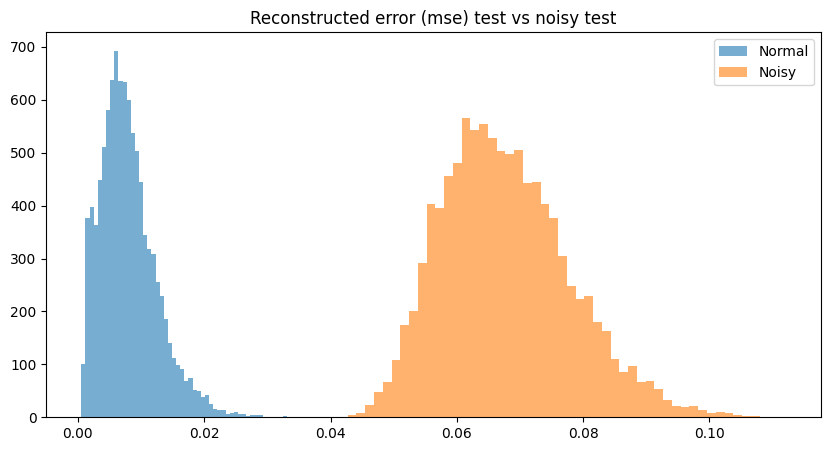

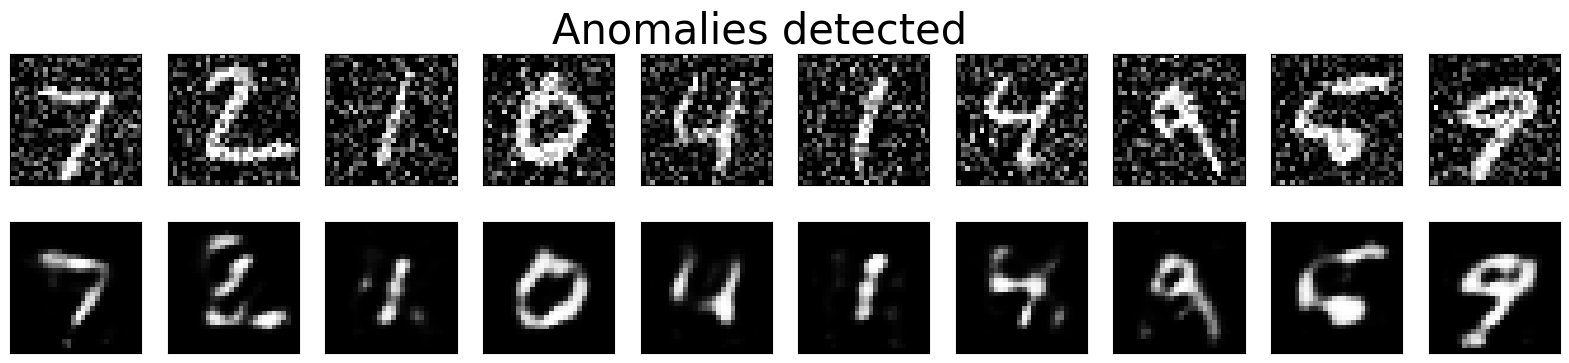

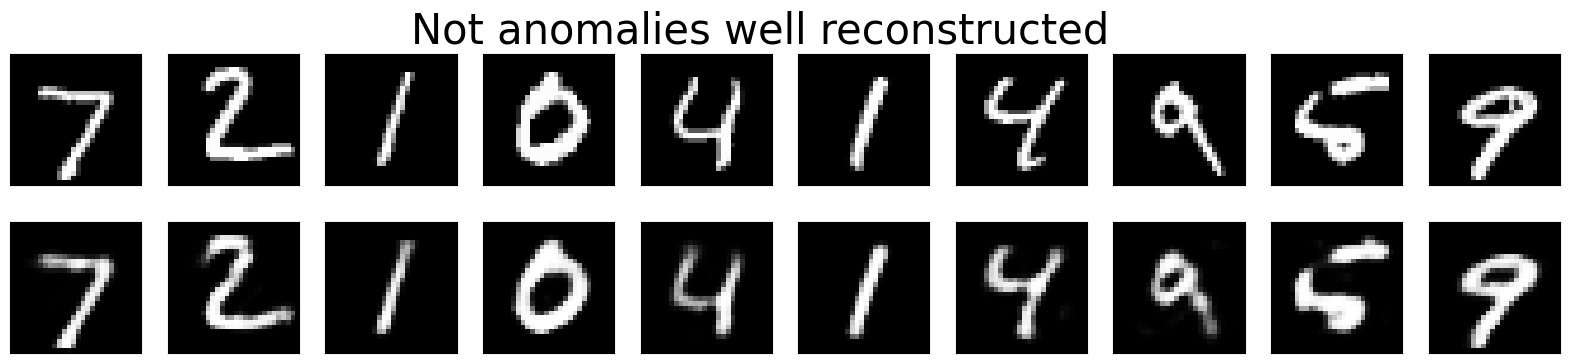

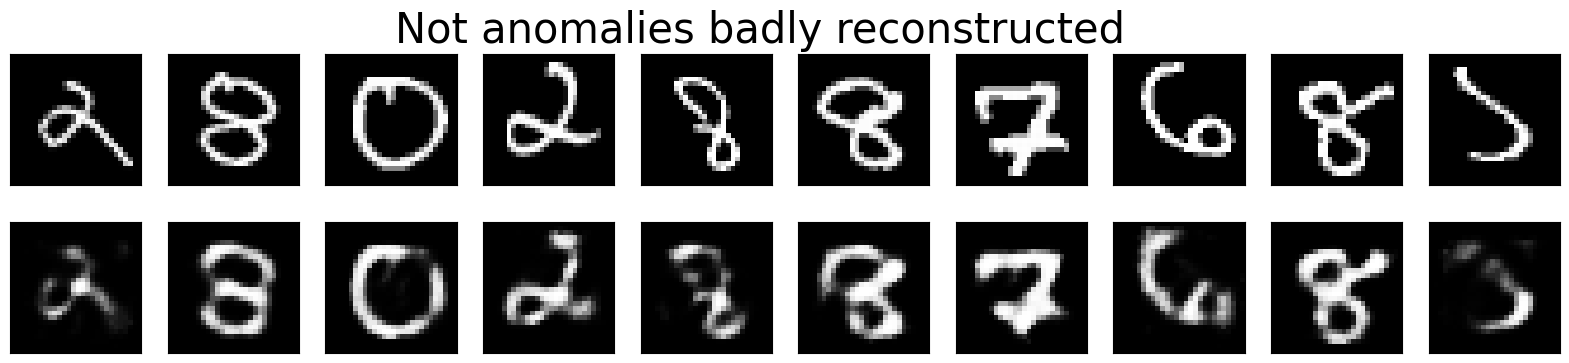

In [81]:
# Plot the MSE for normal and noisy images
plt.figure(figsize=(10, 5))
plt.hist(mse_normal, bins=50, alpha=0.6, label='Normal')
plt.hist(mse_noisy, bins=50, alpha=0.6, label='Noisy')
plt.legend()
plt.title("Reconstructed error (mse) test vs noisy test")
plt.show()

# Define a threshold for anomaly detection
threshold = 0.025

# Detect anomalies
anomalies = mse_noisy > threshold

# Display some of the anomalies
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.suptitle("Anomalies detected", fontsize=30)
plt.show()

# Display some of the anomalies
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.suptitle("Not anomalies well reconstructed", fontsize=30)
plt.show()

errors = mse_normal > threshold

# Display some of the anomalies
n = 10
plt.figure(figsize=(20, 4))
for i in range(min(n, errors.sum())):
    # Display noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[errors][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[errors][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.suptitle("Not anomalies badly reconstructed", fontsize=30)
plt.show()


# BONUS TRACK (pero chulo)
Repetir el experimento pero quitando una clase (el 7 o el 0 por ejemplo).
Entrenar el modelo sin esa clase y luego al predecir el text dejar las clases originales y la clase que falta para ver si esa clase la reconoceria como anomalia.

In [82]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

In [83]:
# Load the MNIST dataset

# Los autoencoders solo utilizan las imágenes (x_train y x_test) porque se 
# entrenan para reconstruir las entradas, no para clasificarlas.


(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [84]:
# Normalize the data

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [85]:
# Reshape the data to fit the model

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [86]:
# Introduce random noise to the test set to create anomalies
number_out = (7,)

In [87]:
import pandas as pd

In [88]:
x_train_7 = x_train[pd.Series(y_train).isin(number_out)]

In [89]:
x_train_no7 = x_train[pd.Series(y_train).isin(number_out).apply(lambda x : not x)]

In [90]:
x_test_7 = x_test[pd.Series(y_test).isin(number_out)]

In [91]:
x_test_no7 = x_test[pd.Series(y_test).isin(number_out).apply(lambda x : not x)]

In [92]:
# Clip the values to be between 0 and 1
# YOUR CODE HERE

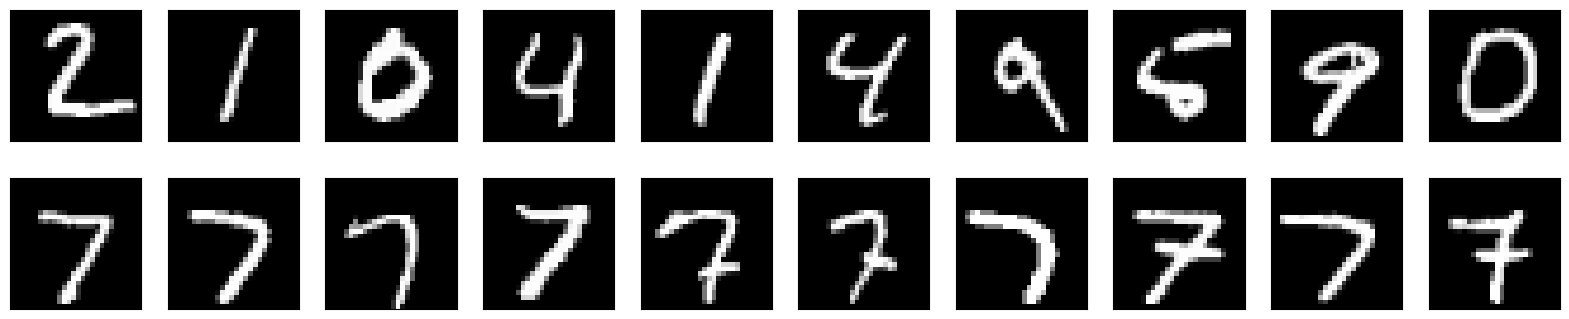

In [93]:
# Plot some examples of normal and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display normal images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_no7[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_7[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [99]:
# Define the dimensions of the input image
input_img = Input(shape=(28, 28, 1))


# Encoder

x = Flatten()(input_img)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)


# Decoder

x = Dense(128, activation='relu')(x)
x = Dense(784, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)


In [100]:
# Autoencoder model
autoencoder = Model(input_img, decoded)

In [101]:
# Compile the model

autoencoder.compile(optimizer= "adam",
                    loss = "binary_crossentropy")

In [102]:
# Display the model architecture
autoencoder.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
# Train the autoencoder


history = autoencoder.fit(
    x_train_no7, x_train_no7,
    epochs=10, 
    batch_size=256, 
    shuffle=True, 
    validation_split=0.2
    
    
    )


Epoch 1/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3546 - val_loss: 0.1605
Epoch 2/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1481 - val_loss: 0.1234
Epoch 3/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1189 - val_loss: 0.1111
Epoch 4/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1082 - val_loss: 0.1043
Epoch 5/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1025 - val_loss: 0.0999
Epoch 6/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0984 - val_loss: 0.0976
Epoch 7/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0956 - val_loss: 0.0948
Epoch 8/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0932 - val_loss: 0.0929
Epoch 9/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0918 - val_loss: 0.0915
Epoch 10/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0900 - val_loss: 0.0902


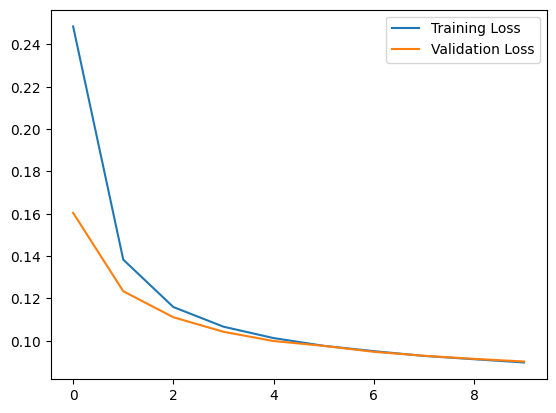

In [104]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [108]:
# Predict on the normal and noisy test sets
print(np.mean(mse_normal))
print(np.mean(mse_noisy))

0.008014249
0.06770517706535731


In [109]:
# Predict on the normal and noisy test sets

decoded_imgs_no7 = autoencoder.predict(x_test_no7)
decoded_imgs_7= autoencoder.predict(x_test_7)

281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [110]:
# Calculate the mean squared error between the original and reconstructed images


mse_normal = np.mean(np.power(x_test_no7 - decoded_imgs_no7, 2), axis=(1,2,3))
mse_noisy = np.mean(np.power(x_test_7 - decoded_imgs_7, 2), axis=(1,2,3))

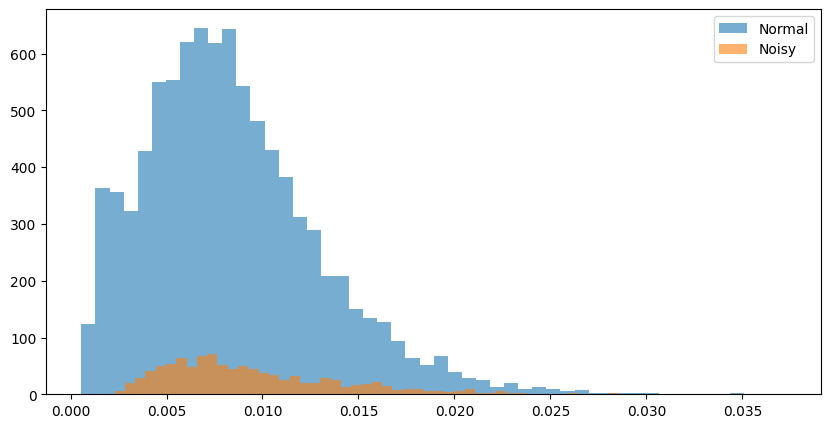

In [111]:
# Plot the MSE for normal and noisy images
plt.figure(figsize=(10, 5))
plt.hist(mse_normal, bins=50, alpha=0.6, label='Normal')
plt.hist(mse_noisy, bins=50, alpha=0.6, label='Noisy')
plt.legend()
plt.show()

In [112]:
# Define a threshold for anomaly detection
threshold = 0.02

In [113]:
# Detect anomalies
anomalies = mse_noisy > threshold

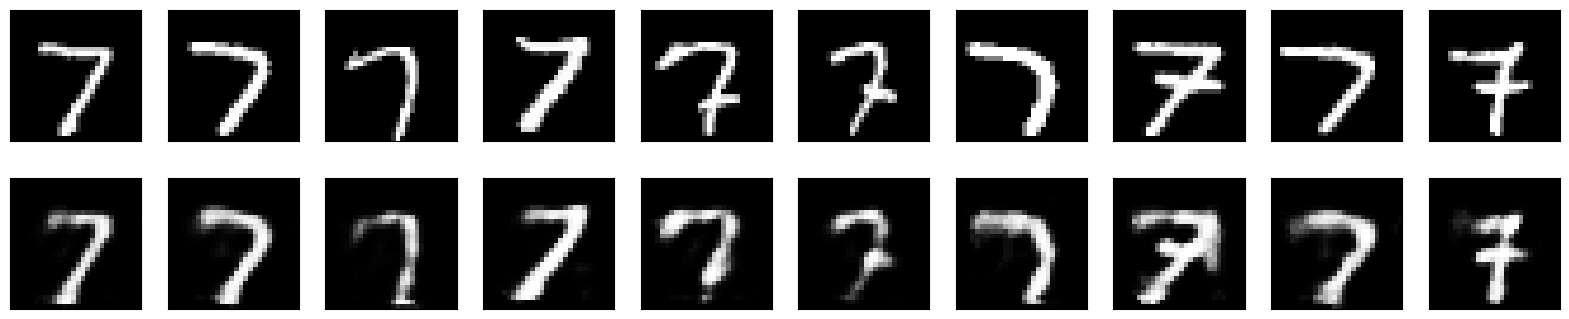

In [114]:

# Display some of the anomalies
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_7[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_7[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
